## Wondrous Numbers with Unwarranted Comments

`DISCLAIMER`

I take no responsibility for any mental or emotional injury occurred during reading of unwarranted comments. This entire thing is meant as a joke on how programmers take themselves too seriously and attach too much of their ego to absurdly small differences in coding, which, as someone who's lived a similar life (attaching ego to absurdly small differences) as a classical musician, feels entirely too familiar and useless a trap.

It's awesome that you actually did the challenge. You're awesome. Okay stop wiping out the tears.

### The Challenge

Wondrous numbers are defined thus: 
- Start with an arbitrary natural number. 
- If the number is even, divide it by 2. If it is odd, multiply by 3 and add 1. 
- Repeat until you come out with 1. A number is wondrous if and only if it eventually reaches 1 through this process.

Programming assignments:
- Create a program which takes one scalar argument x, and tells you whether or not x is wondrous, and if it is, how many operations did it take to reach 1.
- Create a program  which takes one scalar argument x. Assuming all numbers are wondrous, it plots the sequence of numbers in their trajectory to reach 1.
- Create a program  which takes one numeric vector argument, and makes a line plot of the number of operations to reach 1 for each of the vector's elements.
- Create any program you wish that expands on the previous programmes and wondrously exceeds all expectations.

In [1]:
import matplotlib.pyplot as plt

def even(x):
    if x%2 == 0:
        return True
    else:
        return False

### Unwwarranted Comments

This helper function is utterly unnecessary. You could have just added `if x % 2 == 0` as a condition in the function below instead of all this nonsense above, but if you insist on this garbage here is a more Pythonic version:

In [2]:
def is_even(num):
    return True if num % 2 == 0 else False

In [3]:
def wnum(x):
    n = 10000000000000
    step_count = 0
    steps = [x]
    for i in range(n):
        if x == 1:
            return steps, step_count

        if even(x):
            x = int(x/2)
            steps.append(x)
        else:
            x = int(3*x + 1)
            steps.append(x)

        step_count += 1

    return [], n

### Unwarranted Comments

On looping:

- since the number of operations is unknown ahead of time and variable, you don't want a for loop. A while loop is preferred since we have a stopping condition (`x == 1`) but if you insist on a for loop, below's a slighly less abhorrent one.

More things: 
- you specified `i` (for iteration one presumes) but didn't use it, and created a duplicate iterator called `step_count` for no good reason;
- the code would be more "elegant" and DRY if you just append to the `steps` list once at the first indent of the for loop.
- `x*3 +1` will always be integer unless you find yourself located in a different rule-space-time in the [ruliad](https://writings.stephenwolfram.com/2021/11/the-concept-of-the-ruliad/). 
- I'm having a hard time pronouncing `wnum`.

In [4]:
def wondrous_for(x):
    n = int(1e13)
    steps = []
    for i in range(n):
        if x == 1:
            return steps, i
        
        if x % 2 == 0:
            x = int(x/2)
        else:
            x = x*3 +1
        steps.append(x)
    return [], n

In [5]:
wondrous_for(17)

([52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1], 12)

Here's the while version:

In [6]:
def wondrous_while(x):
    steps = []
    while x > 1:
        if x % 2 == 0:
            x = int(x/2)
        else:
            x = x*3 +1
        steps.append(x)
    return steps, len(steps)

In [7]:
wondrous_while(17)

([52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1], 12)

In [8]:
# "unit" test
big_data = 2345198723459871234598712345987123459845499293482492348923423
assert wondrous_for(big_data) == wondrous_while(big_data)

### Warranted Comment?

Possibly the only thing I should've written - you can actually write a __recursive function__ to solve for this same thing. It will take you an inordinate amount of time (unless you cheat by looking it up, it's plastered all over the world wide web) and it will solve nothing except you will feel smarter. Possibly supider. Sometimes both. I've done it and feel all those things... I'll share it with you on three conditions: 
1. you're still my friend after this
2. you want to see it
3. you have no desire to spend any more time with this silliness

As a side note, I highly recommend *Recursion* by Blake Crouch. I just started reading it after reading *Dark Matter* which I also recommend.

### Program 1

In [9]:
def program_1(x):
    steps, step_count = wnum(x)
    if len(steps) != 0:
        print('Wondrous: ' + str(step_count) + ' steps')
    else:
        print('Not wondrous')

You did extra credit for providing the __hailstone sequence__ and then didn't use it... I didn't ask for error checking so my fault there but this is what I did because I just wanted to remember Python since I'm forgetting it all. It's a CLI thing so it will fail here:

In [10]:
%%capture

#!/usr/local/bin/python3
import sys

def check_args():
    """Check user input for arguments and correctness of arguments.
    """
    err_msg = 'ERROR: Must provide a single natural number.\nUSAGE:\
 $ python wondrous.py <positive_integer>'
    # check if an arg was passed
    if len(sys.argv) != 2:
        print(err_msg); sys.exit(1)
    else:
        # check that arg can be converted to int
        try:
            arg = int(sys.argv[1])
        except ValueError as e1:
            print(''.join(['ERROR: ', str(e1)]))
            sys.exit(1)
        # check that it is a natural number
        if arg <= 0:
            print(err_msg); sys.exit(1)
        else:
            return arg


def get_sequence(x):
    """Take a scalar argument x and return a list with the hailstone
    sequence of wondrous numbers for x. Assume all natural numbers are 
    wondrous (i.e. converge to one, given the Collatz conjecture).
    """
    seq = []
    while x > 1:
        if x % 2 == 0:
            x = x/2
        else:
            x = x*3 +1
        seq.append(int(x))
    return seq


if __name__=='__main__':
    x = check_args()
    seq = get_sequence(x)
    print(f'Hailstone seq: {seq}')
    print(f'Number of ops: {len(seq)}')

SystemExit: 1

I called this program `collatz.py`, running terminal from this notebook:

In [11]:
! python collatz.py

ERROR: Must provide a single natural number.
USAGE: $ python wondrous.py <positive_integer>


In [12]:
! python collatz.py -1

ERROR: Must provide a single natural number.
USAGE: $ python wondrous.py <positive_integer>


In [13]:
! python collatz.py nick

ERROR: invalid literal for int() with base 10: 'nick'


In [14]:
! python collatz.py 56

Hailstone seq: [28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Number of ops: 19


### Program 2

In [15]:
def program_2(x):
    program_1(x)
    steps, step_count = wnum(x)
    if len(steps) != 0:
        seq = list(range(1, len(steps)+1))
        plt.scatter(seq, steps)
        plt.show()

Wondrous: 144 steps


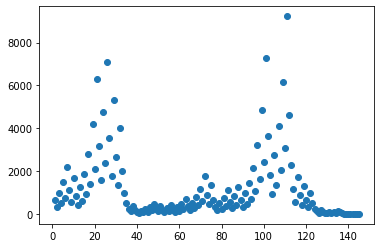

In [16]:
program_2(654)

Alright fine that's a really cool plot isn't it. You picked an interesting number. What boggles my mind is how we humans take time to get to a simpler way to write a function. Doesn't that bother you too? You had a `step_count` and yet you recalculate it with `len(steps)` two times. I saw that one of them was unnecessary but didn't see the other until I was re-reading this... what else am I missing?

In [17]:
def plot_numops(x):
    steps, step_count = wondrous_while(x)
    if step_count > 0:
        xticks = list(range(1, step_count+1))
        plt.scatter(xticks, steps)
        plt.show()

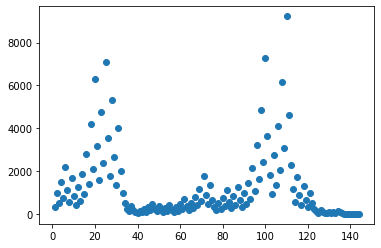

In [18]:
plot_numops(654)

### Program 3

In [19]:
def program_3(x_list):
    step_counts = []
    for x in x_list:
        steps, step_count = wnum(x)
        if len(steps) != 0:
            step_counts.append(step_count)
        else:
            step_counts.append(0)
    plt.scatter(x_list, step_counts)
    plt.show()

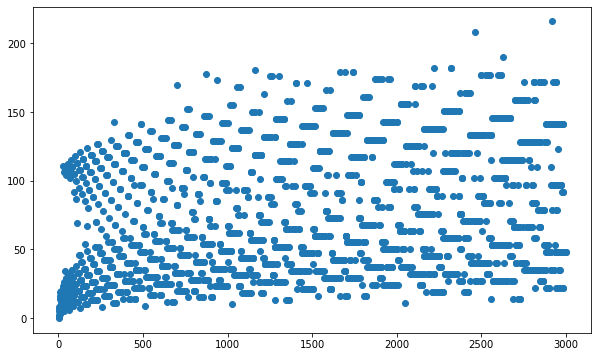

In [20]:
plt.rcParams["figure.figsize"] = (10, 6)
x_list = list(range(1, 3000+1))
program_3(x_list)

Starting to get ridiculously cool right? Let's look at how absurd your programming skills are in this hastily put together primordial soup of a function. 

You know what, I'm tired of berating you. It takes energy to abuse. I'm just going to show what I did.

In [21]:
def get_seqlens(seq):
    """Get a sequence of lengths of the 
    hailstone sequences.
    """
    lens = []
    for x in seq:
        seq, n = wondrous_while(x)
        lens.append(n)
    return lens

def plot_seqlens(n):
    """Plot a range of sequences of lengths.
    """
    lens = get_seqlens(range(1, n))
    plt.plot(lens, '.')
    plt.show()

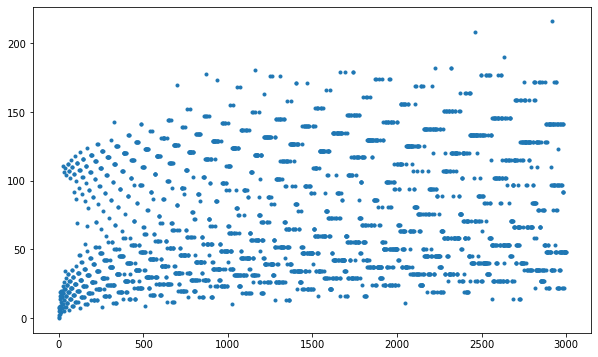

In [22]:
plot_seqlens(3000)

I never asked for the hailstone sequences but since you did that extra credit... wouldn't it be fun to plot it? 

In [23]:
def get_seqseqs(seq):
    """Get a sequence of hailstone sequences.
    """
    seqs = []
    for x in seq:
        seq, n = wondrous_while(x)
        seqs.append(seq)
    return seqs

def plot_seqseqs(n, thresh=100, log=False):
    """Plot the sequence of sequences, above
    a threshold of length. Defaults to 100.
    """
    import numpy as np
    
    seqs = get_seqseqs(range(1, n))
    for seq in seqs:
        if len(seq) > thresh:
            if log:
                seq = np.log(seq)
            plt.plot(seq, '.')

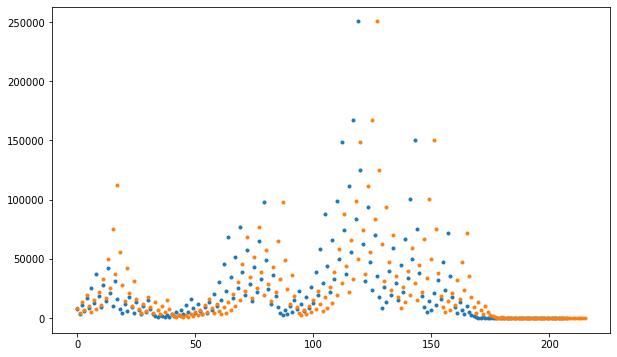

In [24]:
plot_seqseqs(3000, thresh=200)

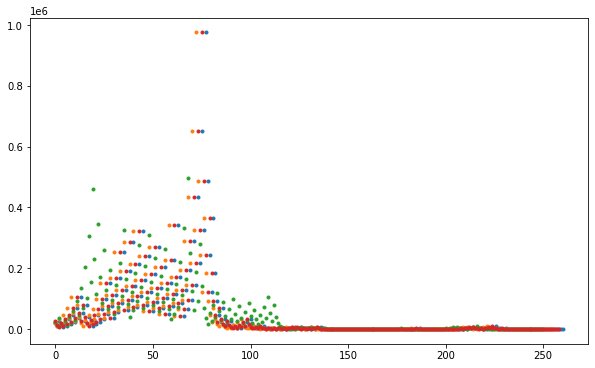

In [25]:
plot_seqseqs(10000, thresh=250)

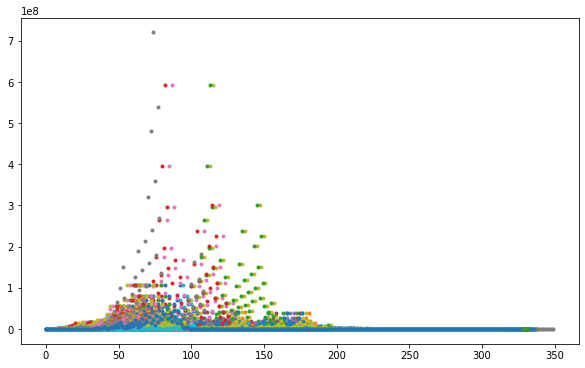

In [26]:
plot_seqseqs(100000, thresh=300)

Woah. Right? Something must be going on in there, this is why I made the log version. But also, super extra credit out of sheer curiosity:
- Why is it rare to have long hailstone sequences; what's the math theory behind this?
- Easier: return those numbers that have long sequences, do they have something in common? Are they themselves longer numbers?

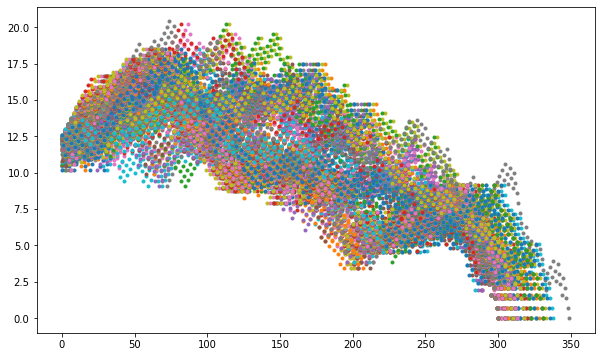

In [27]:
plot_seqseqs(100000, thresh=300, log=True)

So I also made the `thresh` because it takes a long time to plot all the lower values... interesting right? I bet you can use some sort of unsupervised ML model to separate these strands, like K-means or something.

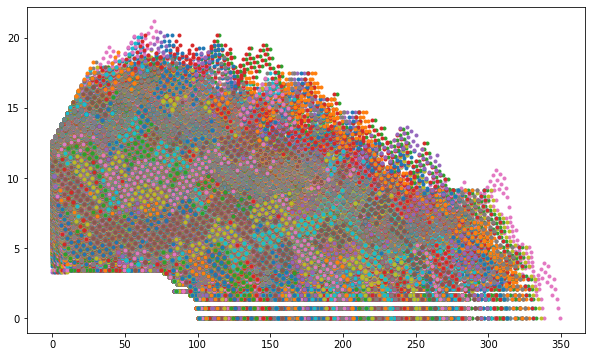

In [28]:
plot_seqseqs(100000, thresh=100, log=True)

I wonder if these gaps at the bottom are due to some mathematical property or the fact I used a threshold or some plotting issue.

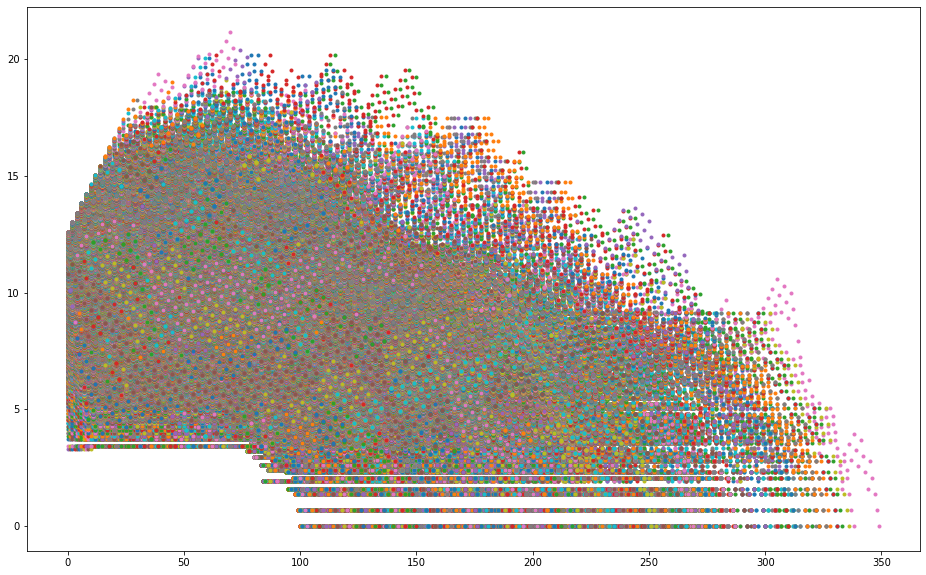

In [29]:
plt.rcParams["figure.figsize"] = (16, 10)
plot_seqseqs(100000, thresh=100, log=True)

---